# scikit-learn

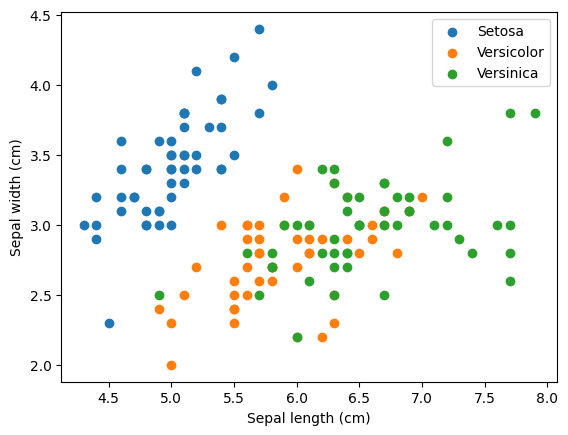

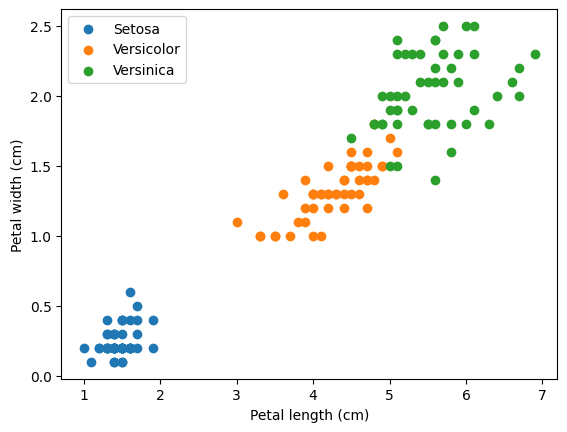

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Irisデータの読み込み
iris = datasets.load_iris()

# 各花のサイズ
iris_data = iris.data

# 散布図で表示
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
vn_data = iris_data[100:150]  # Versinica

plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")  # Sepal lengthとSepal width
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")  # Sepal lengthとSepal width
plt.scatter(vn_data[:, 0], vn_data[:, 1], label="Versinica")  # Sepal lengthとSepal width
plt.legend()
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

plt.scatter(st_data[:, 2], st_data[:, 3], label="Setosa")  # Petal lengthとPetal width
plt.scatter(vc_data[:, 2], vc_data[:, 3], label="Versicolor")  # Petal lengthとPetal width
plt.scatter(vn_data[:, 2], vn_data[:, 3], label="Versinica")  # Petal lengthとPetal width
plt.legend()
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

In [ ]:
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
# print(iris.target)  # 品種を表すラベル 0:Setosa、1:Versicolor、2:Versinica

clf = svm.SVC()  # サポートベクターマシーン
clf.fit(iris.data, iris.target)  # 訓練

# 品種の判定 (Sepal length, Sepal width, Petal length, Petal width)
print(clf.predict([[5.1, 3.5, 1.4, 0.1], [6.5, 2.5, 4.4, 1.4], [5.9, 3.0, 6.2, 2.0]]))

[0 1 2]


# 手書き文字の認識

--- 画像データ ---
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 8, 8)
--- 1次元画像データ ---
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797, 64)
--- ラベル ---
[0 1 2 ... 8 9 8]
(1797,)


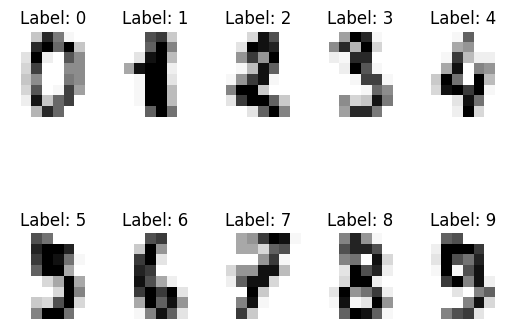

In [ ]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

# 数字画像データの読み込み
digits = datasets.load_digits()

print("--- 画像データ ---")
print(digits.images[0])
print(digits.images.shape)
print("--- 1次元画像データ ---")
print(digits.data[0])
print(digits.data.shape)
print("--- ラベル ---")
print(digits.target)
print(digits.target.shape)

# 画像と正解値の表示
images = digits.images
labels = digits.target
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2行5列、i+1の位置
    plt.imshow(images[i], cmap="Greys")
    plt.axis("off")
    plt.title("Label: " +  str(labels[i]))
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        48
           4       0.97      0.97      0.97        40
           5       1.00      0.96      0.98        48
           6       0.98      0.98      0.98        47
           7       1.00      1.00      1.00        52
           8       0.97      1.00      0.99        38
           9       0.96      0.98      0.97        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

[[49  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  1]
 [ 0  0  0  0  0 46  1  0  0  1]
 [ 0  1  0  0  0  0 46  0  0  0]
 [ 0  0  0

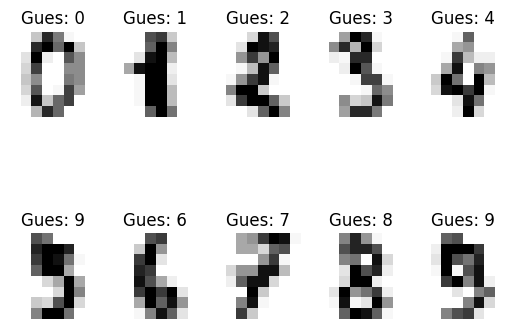

In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# 訓練データとテストデータに分割
digits = datasets.load_digits()
x_train, x_test, t_train, t_test = train_test_split(digits.data, digits.target)  # 25％がテストデータ

clf = svm.SVC()  # サポートベクターマシーン
clf.fit(x_train, t_train)  # 訓練

y_test = clf.predict(x_test)  # テストデータで予測
print(metrics.classification_report(t_test, y_test))  # 正解率など
print(metrics.confusion_matrix(t_test, y_test))  # 行:正解、列:予測

# 予測結果と画像の対応
images = digits.images[:10]  # 最初の10枚
y_10 = clf.predict(digits.data[:10])
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2行5列、i+1の位置
    plt.imshow(images[i], cmap="Greys")
    plt.axis("off")
    plt.title("Gues: " +  str(y_10[i]))
plt.show()

# 株価分析

In [12]:
from sklearn import svm
from sklearn.model_selection import train_test_split

with open("/content/drive/MyDrive/Colab Notebooks/stock_price.txt", "r") as f:
    stock_file_data = f.read()  # ファイルの読み込み
stock_file_data = stock_file_data.split()  # 改行で分割しリストに格納
stock_data = []
for stock_string in stock_file_data:
    stock_data.append(float(stock_string))  # 小数に変換した上でリストに格納

# データの確認
print("株価", stock_data)
n_price = len(stock_data)
print("株価データの数", n_price)
print("---")

# 株価の変化率
ratio_data = []
for i in range(1, n_price):
    ratio_data.append(float(stock_data[i] - stock_data[i-1]) / float(stock_data[i-1]))
print("株価の変化率", ratio_data)
n_ratio = len(ratio_data)
print("株価の変化率データの数", n_ratio)
print("---")

# 前日までの4連続の変化率のデータ
successive_data = []
answers = []  # 正解値 価格上昇: 1 価格低下: 0
for i in range(4, n_ratio):
    successive_data.append([ratio_data[i-4], ratio_data[i-3], ratio_data[i-2], ratio_data[i-1]])
    if ratio_data[i] > 0:
        answers.append(1)
    else:
        answers.append(0)
print("4日連続の変化率", successive_data)
print("正解", answers)
print("---")

x_train, x_test, t_train, t_test = train_test_split(successive_data, answers, shuffle=False)  # シャッフルしない

clf = svm.SVC()  # サポートベクターマシーン
clf.fit(x_train, t_train)  # 訓練

y_test = clf.predict(x_test)  # テスト用データで予測

# 末尾の10個を比較
print ("正解:", t_test[-10:])
print ("予測:", y_test[-10:])
print("---")

# 正解率の計算
correct = 0.0
wrong = 0.0
for i in range(len(t_test)):
    if y_test[i] == t_test[i]:
        correct += 1.0
    else:
        wrong += 1.0
print ("正解率:", str(correct / (correct+wrong) * 100), "%")

株価 [10000.0, 9993.0, 10259.0, 10469.0, 10602.0, 10591.0, 10952.0, 11239.0, 11269.0, 11186.0, 11430.0, 11872.0, 12430.0, 12146.0, 12288.0, 12216.0, 12244.0, 12222.0, 12366.0, 12336.0, 12583.0, 12453.0, 12566.0, 13123.0, 12904.0, 13269.0, 13496.0, 13315.0, 13481.0, 13362.0, 12920.0, 12440.0, 12263.0, 12020.0, 11625.0, 11092.0, 11491.0, 11559.0, 11202.0, 11183.0, 10806.0, 11011.0, 11280.0, 11581.0, 11748.0, 11736.0, 11829.0, 12416.0, 12312.0, 12384.0, 12111.0, 11943.0, 12136.0, 12720.0, 12634.0, 12943.0, 12960.0, 12957.0, 12527.0, 12515.0, 12529.0, 12788.0, 12620.0, 12870.0, 12756.0, 12967.0, 12916.0, 13039.0, 13086.0, 12985.0, 12548.0, 12586.0, 12685.0, 12778.0, 13375.0, 13729.0, 13998.0, 13638.0, 13686.0, 13507.0, 13882.0, 13919.0, 14495.0, 14961.0, 14686.0, 14684.0, 14690.0, 14327.0, 13816.0, 13649.0, 13493.0, 13169.0, 12577.0, 12041.0, 11748.0, 11757.0, 11630.0, 11756.0, 11915.0, 12086.0, 12214.0, 12431.0, 12728.0, 12640.0, 12164.0, 12144.0, 11987.0, 12343.0, 12653.0, 12601.0, 12521.0

# ワインの分類

In [16]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# ワインのデータを読み込み
wines = datasets.load_wine()
print(wines.data.shape)
print(wines.target.shape)

# 訓練データとテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(wines.data, wines.target)

clf = svm.SVC()  # この行にコードを追記
clf.fit(x_train, t_train) # この行にコードを追記

y_test =  clf.predict(x_test)  # この行にコードを追記
print(metrics.classification_report(t_test, y_test))  # 正解率など
print(metrics.confusion_matrix(t_test, y_test))  # 行:正解、列:予測

(178, 13)
(178,)
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.71      0.65      0.68        23
           2       0.36      0.36      0.36        11

    accuracy                           0.67        45
   macro avg       0.64      0.67      0.65        45
weighted avg       0.66      0.67      0.66        45

[[11  0  0]
 [ 1 15  7]
 [ 1  6  4]]
